<a href="https://colab.research.google.com/github/BhavyaniD/Data-Management/blob/main/DATA_MANAGEMENT_SOCIO_ECONOMIC_ANALYSIS_AT_COUNTY_LEVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOCIO-ECONOMIC ANALYSIS AT COUNTY LEVEL IN THE UNITED STATES FOR THE YEAR 2024**

**Introduction:**


Health and socioeconomic disparities in the United States have long been subjects of public concern and policy discussions. Counties across the country exhibit substantial variations in life expectancy, disease prevalence, access to healthcare, and economic stability, making it imperative to investigate the underlying factors contributing to these differences.

This project integrates data from multiple sources, including health statistics, economic conditions, environmental measures, and social behaviors, to form a multi-faceted view of community well-being. Specifically, our study seeks to address the following key questions:

1. How do economic factors like income, unemployment, and housing costs affect health outcomes?

2. What role does environmental pollution play in determining health conditions at the county level?

3. Is there a significant link between intoxication-related behaviors (smoking, drinking, drug use) and mortality rates?

4. Which states and counties exhibit the highest disparities in health and economic conditions?


To answer these questions, we perform extensive data preprocessing, correlation analysis, statistical modeling, and visualization. The project aims to not only describe existing disparities but also provide actionable insights for improving public health through evidence-based decision-making.

By leveraging data analytics and visualization techniques, this study will facilitate better understanding of risk factors at a granular level, guiding targeted interventions and policy reforms.

**Plan of action:**

1. Load the data from the below link and change the data sheets into different excel files:
https://www.countyhealthrankings.org/sites/default/files/media/document/2024_county_health_release_data_-_v1.xlsx

2. Clean the data, select the columns which are necessary for our analysis

3. Extract descriptive statistics and Visualize few interesting details from the data sets and interpret them.

4. Create different categories and merge all the columns belonging to a particular category into one dataframe: Health, Economic, Socio-Demographic, Environmental and Intoxication.

5. Visualize each category in detail and interpret the findings

6. Find the shapefile for all counties in the USA and merge with the present data set

7. Plot the selected variables (2/more) on the map using geopandas

8. Perform Clustering for high risk counties

9. Consider Health category, find the available health care and analyse the healthcare accessibility vs Travel distance

10. Merge the data for Cost of healthcare and insurance and analyse

11. Consider Socio-economics category and analyse Housing and rental affordability

12. Merge the data for Crime rate per county and Understand the impact of homelessness on the crime rate

**PS - 0:**

In [ ]:
!pip install ace-tools

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
# Import Datasets
select_measure_data = pd.read_excel('/content/Select Measures Data.xlsx')
additional_measure_data = pd.read_excel('/content/Additional Measure Data .xlsx')

In [ ]:
# View the data
select_measure_data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Adults Reporting Currently Smoking,...,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Children in Single-Parent Households,Social Association Rate,Injury Death Rate,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone
0,1000,Alabama,NaN,98140.0,11415.734833,17.8,3.934735,5.869320,10.480008,17.9,...,61.604162,2.596766,21.8,5.212688,30.587530,11.694730,90.379699,13.081247,82.825024,35.2
1,1001,Alabama,Autauga,942.0,9407.948438,17.3,3.910265,5.703204,9.871335,16.9,...,64.147501,2.269588,15.7,4.637675,22.702506,12.691429,68.033478,15.375696,85.427842,42.9
2,1003,Alabama,Baldwin,3789.0,8981.575353,15.2,3.730943,5.373666,8.124318,15.0,...,65.680418,2.350047,16.1,4.482449,19.051287,9.653397,77.507985,12.427866,81.346999,37.9
3,1005,Alabama,Barbour,579.0,13138.848362,27.3,5.023488,6.014294,12.272491,25.0,...,40.454475,4.065041,37.7,5.576797,50.660451,8.412113,85.215853,15.075107,82.052512,36.7
4,1007,Alabama,Bibb,501.0,12675.434581,22.0,4.552795,5.824583,9.828571,22.0,...,38.993512,2.509741,25.5,5.669237,30.713370,8.897985,99.933081,12.258953,87.983631,53.8


In [ ]:
additional_measure_data.head()

,FIPS,State,County,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,...,% 65 and Over,% Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,73.707861,548.756171,73.033842,12.366651,19.578269,13.3,339.7,...,18.026796,26.430898,0.715863,1.588693,0.109493,4.931778,64.711716,1.047498,51.375324,42.262760
1,1001,Alabama,Autauga,75.263497,472.283923,58.562128,11.700000,18.000000,10.7,218.0,...,16.410917,21.011061,0.471895,1.178065,0.122157,3.381917,72.051072,0.366486,51.296039,40.676813
2,1003,Alabama,Baldwin,76.738314,416.218912,54.035005,11.000000,17.300000,9.8,174.3,...,21.928703,8.224887,0.810761,1.156086,0.066549,5.036216,82.978473,0.786658,51.239069,37.586455
3,1005,Alabama,Barbour,72.377024,628.253596,80.039130,15.800000,20.500000,15.6,513.7,...,20.622521,47.195013,0.724520,0.469522,0.279284,5.099976,45.272403,1.980660,47.122157,65.919994
4,1007,Alabama,Bibb,72.251369,618.323859,100.872548,14.000000,19.400000,12.4,269.3,...,17.805044,20.736196,0.572597,0.290843,0.131788,3.176551,73.996819,0.289182,46.489434,100.000000


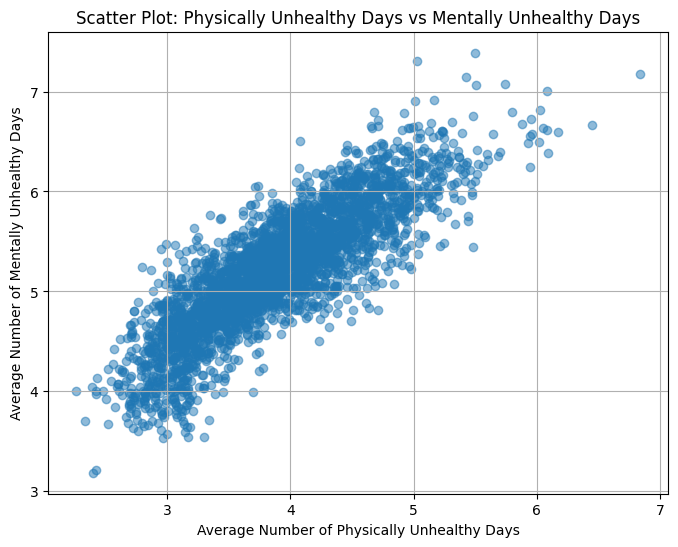

In [ ]:
### OVERALL BASIC VISUALIZATION

# Plot 1: Scatter plot comparing Physically Unhealthy Days vs Mentally Unhealthy Days
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Average Number of Physically Unhealthy Days"], merged_df["Average Number of Mentally Unhealthy Days"], alpha=0.5)
plt.xlabel("Average Number of Physically Unhealthy Days")
plt.ylabel("Average Number of Mentally Unhealthy Days")
plt.title("Scatter Plot: Physically Unhealthy Days vs Mentally Unhealthy Days")
plt.grid(True)
plt.show()


Surprisingly the number of days people feel physically ill highly correlates to the number of days they feel mentally unwell. This exhibits the importance of accessible mental health as much as the physical healthcare.

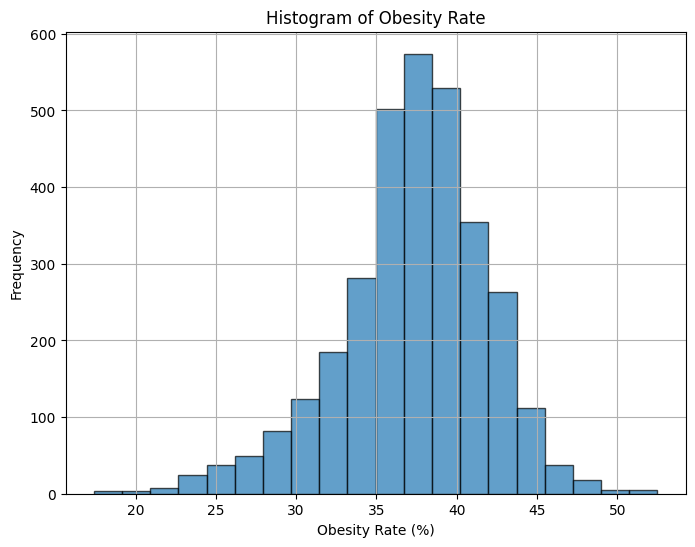

In [ ]:
# Plot 2: Histogram for Obesity Rate
plt.figure(figsize=(8, 6))
plt.hist(merged_df["% Adults with Obesity"].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Obesity Rate")
plt.grid(True)
plt.show()


The histogram shows that mos.t regions have an adult obesity rate between 30% and 45%, with a peak around 35-40%, indicating a roughly normal distribution. There is a slight right skew, suggesting a few regions have exceptionally high obesity rates above 45%.


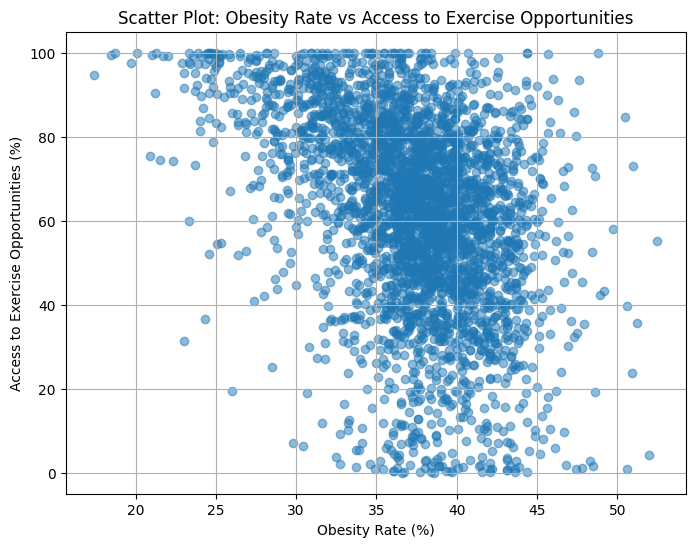

In [ ]:

# Plot 3: Scatter plot of Obesity Rate vs Access to Exercise Opportunities
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["% Adults with Obesity"], merged_df["% With Access to Exercise Opportunities"], alpha=0.5)
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Access to Exercise Opportunities (%)")
plt.title("Scatter Plot: Obesity Rate vs Access to Exercise Opportunities")
plt.grid(True)
plt.show()


The distribution suggests a weak negative correlation, where higher access to exercise opportunities is generally associated with lower obesity rates, but the trend is not strong.

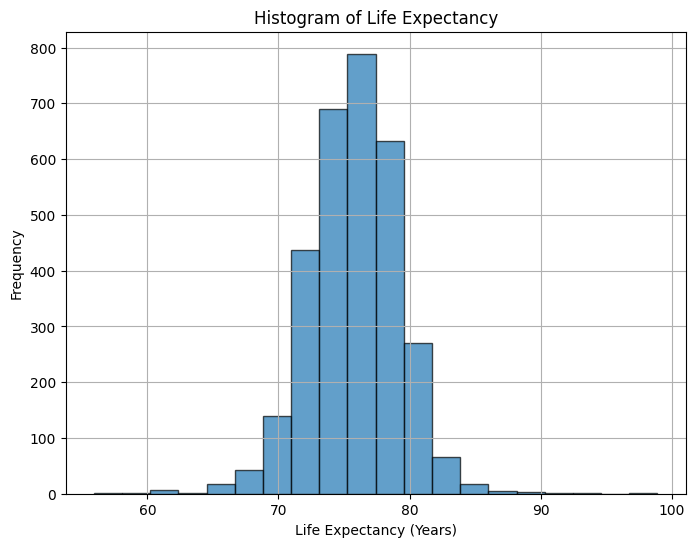

In [ ]:

# Plot 4: Histogram of Life Expectancy
plt.figure(figsize=(8, 6))
plt.hist(merged_df["Life Expectancy"].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Histogram of Life Expectancy")
plt.grid(True)
plt.show()


 The data appears normally distributed, with most values concentrated between 70 and 80 years. The peak around 75 years suggests that this is the most common life expectancy range.

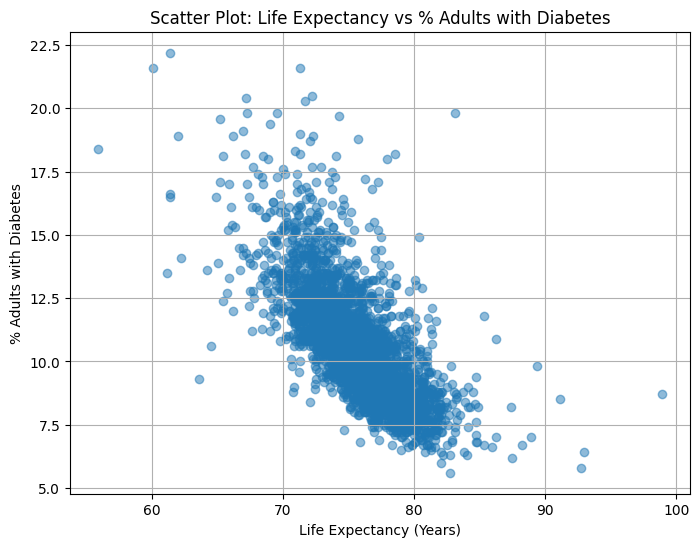

In [ ]:

# Plot 5: Scatter plot of Life Expectancy vs % Adults with Diabetes
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Life Expectancy"], merged_df["% Adults with Diabetes"], alpha=0.5)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("% Adults with Diabetes")
plt.title("Scatter Plot: Life Expectancy vs % Adults with Diabetes")
plt.grid(True)
plt.show()




The trend shows a strong negative correlation, meaning that as the percentage of adults with diabetes increases, life expectancy tends to decrease. This suggests that higher diabetes prevalence is associated with lower life expectancy, likely due to the health complications related to diabetes, such as cardiovascular diseases and organ damage.

**PS - 1:**

In [ ]:
#MERGE DATA AND CREATE CATEGORIES FOR FURTHER ANALYSIS

# Merge both datasets on FIPS, State, and County
merged_df = pd.merge(select_measure_data, additional_measure_data, on=["FIPS", "State", "County"], how="inner")


# Define categories and their corresponding keywords
categories = {
    "Health": ["health", "life expectancy", "mortality", "disease", "obesity",
               "smoking", "diabetes", "physically unhealthy", "mentally unhealthy",
               "limited access to healthy foods", "overdose", "hospitalization"],

    "Economic": ["income", "unemployment", "poverty", "education", "employment", "housing", "insurance"],

    "Social_Demographic": ["population", "age", "race", "ethnicity", "education", "language", "family"],

    "Environmental": ["air pollution", "food access", "water quality", "housing problems", "severe housing cost"],

    "Intoxication": ["smoking", "alcohol", "binge drinking", "drug", "overdose", "opioid"]
}

# Extract category-wise data
category_data = {}
for category, keywords in categories.items():
    category_columns = [col for col in merged_df.columns if any(keyword in col.lower() for keyword in keywords)]
    category_data[category] = merged_df[["FIPS", "State", "County"] + category_columns]

# Compute summary statistics and correlation matrices for each category
summary_stats = {category: df.describe() for category, df in category_data.items()}
correlation_matrices = {category: df.select_dtypes(include=["number"]).corr() for category, df in category_data.items()}




In [ ]:
# Display summary statistics and correlation matrices
#import ace_tools as tools
#for category in categories.keys():
#    tools.display_dataframe_to_user(name=f"{category} Data Summary", dataframe=summary_stats[category])
 #   tools.display_dataframe_to_user(name=f"{category} Correlation Matrix", dataframe=correlation_matrices[category])

# Function to plot correlation heatmaps
def plot_correlation_heatmap(correlation_matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

# Function to plot histograms
def plot_histogram(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True, color="purple")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

# Function to plot scatter plots
def plot_scatter(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Function to plot box plots
def plot_boxplot(data, x_col, y_col, title, ylabel):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


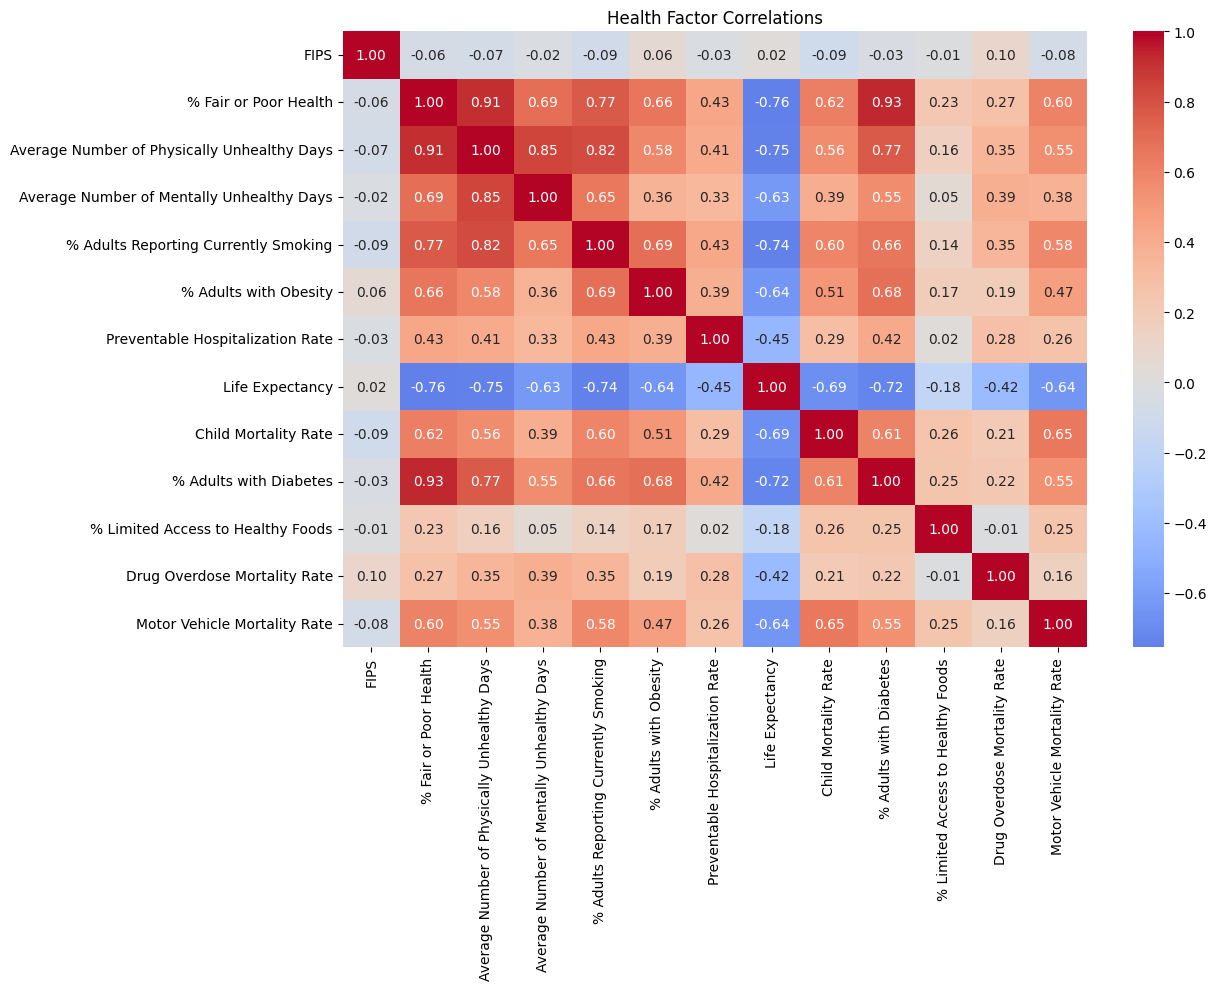

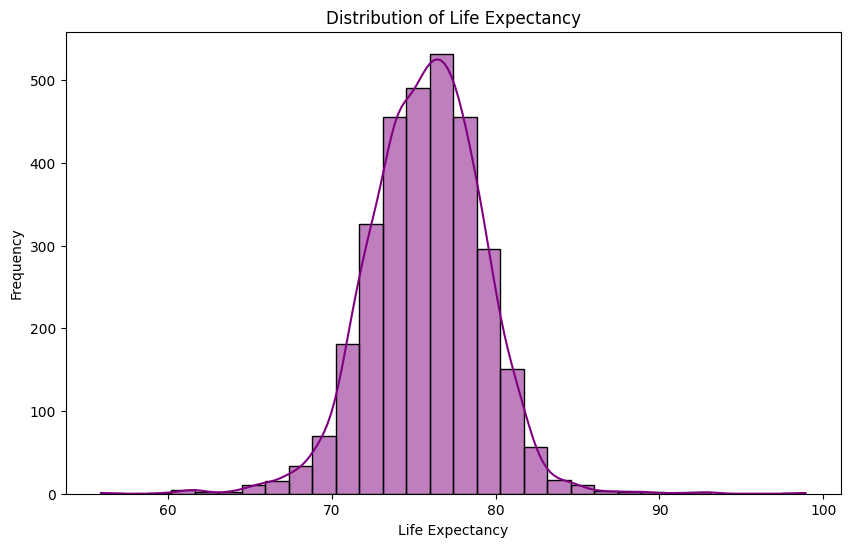

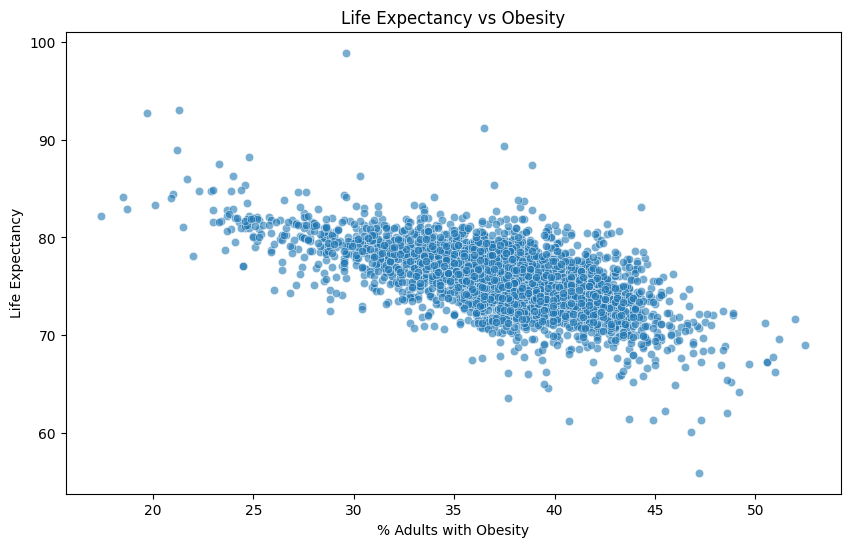

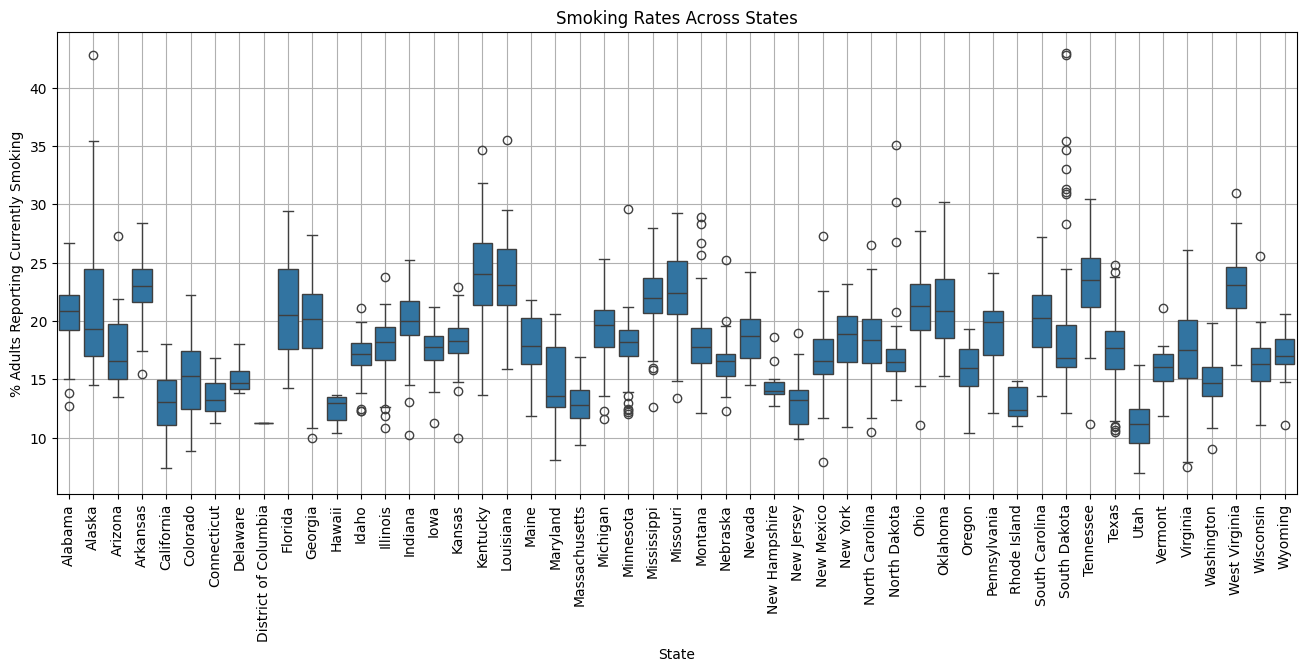

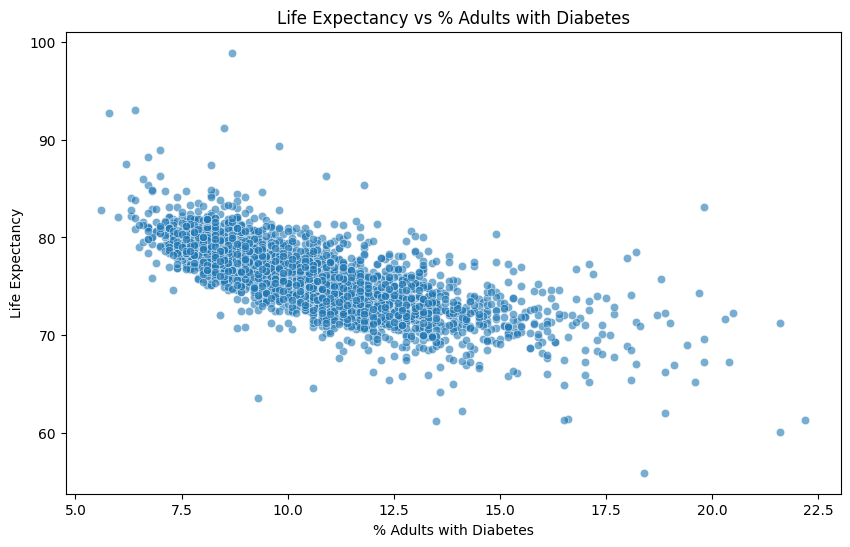

In [ ]:
# Generate visualizations for each category

# Health Factors
plot_correlation_heatmap(correlation_matrices["Health"], "Health Factor Correlations")
plot_histogram(category_data["Health"], "Life Expectancy", "Distribution of Life Expectancy", "Life Expectancy")
plot_scatter(category_data["Health"], "% Adults with Obesity", "Life Expectancy", "Life Expectancy vs Obesity", "% Adults with Obesity", "Life Expectancy")
plot_boxplot(category_data["Health"], "State", "% Adults Reporting Currently Smoking", "Smoking Rates Across States", "% Adults Reporting Currently Smoking")
# Scatter plot of Life Expectancy vs % Adults with Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="% Adults with Diabetes", y="Life Expectancy", alpha=0.6)
plt.title("Life Expectancy vs % Adults with Diabetes")
plt.xlabel("% Adults with Diabetes")
plt.ylabel("Life Expectancy")
plt.show()


1. **Heatmap of Health Factor Correlations** → Life expectancy has a strong negative correlation with obesity (-0.64), diabetes (-0.72), and fair/poor health (-0.76), indicating these factors significantly impact longevity. Positive correlations exist among obesity, diabetes, unhealthy days, and hospitalization rates, suggesting interlinked health risks.

2. **Distribution of Life Expectancy (Histogram with KDE)** → The histogram follows a normal distribution, with most life expectancy values clustering between 75-80 years. Very few regions have extreme values (below 60 or above 90), confirming a central tendency around 77 years.

3. **Life Expectancy vs. % Adults with Obesity (Scatter Plot)** → A strong negative correlation exists, where higher obesity rates (>40%) are associated with lower life expectancy (<75 years). Regions with lower obesity rates (~20%) tend to have a life expectancy above 80 years.

4. **Smoking Rates Across States (Box Plot)** → Smoking rates vary widely across states, with some (e.g., Kentucky, West Virginia) showing high median rates, while others (e.g., California, Utah) have lower rates. Outliers indicate states with extreme smoking behaviors.

5. **Life Expectancy vs. % Adults with Diabetes (Scatter Plot)** → A clear negative correlation shows that as diabetes prevalence increases, life expectancy decreases. Regions with diabetes rates above 15% typically have a life expectancy below 75 years, emphasizing diabetes as a major health concern.